In [8]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import autograd
from torch.nn.parameter import Parameter
from torch.utils.data import Dataset, DataLoader
from sklearn import preprocessing
import math
import copy

# Введем константы из задания
#Для воспроизведения результатов
np.random.seed(11)

#Другие константы
num_neuro_1 = 10
num_neuro_2 = 10
num_neuro_3 = 5

RES_DIR = './results/'
DATA_DIR = './CCPP/'
HOME_DIR = './'

In [9]:
def save_wts(net, save_dir, before=False, is_pytorch=False):
    if is_pytorch:
        net_wts = copy.deepcopy(net.state_dict())
        if before:
            torch.save(net_wts, save_dir+'params_before')
        else:
            torch.save(net_wts, save_dir+'params')
    else:
        w1 = pd.DataFrame((net.lin1.W).data.numpy())
        b1 = pd.DataFrame((net.lin1.b).data.numpy())
        w2 = pd.DataFrame((net.lin2.W).data.numpy())
        b2 = pd.DataFrame((net.lin2.b).data.numpy())
        w3 = pd.DataFrame((net.lin3.W).data.numpy())
        b3 = pd.DataFrame((net.lin3.b).data.numpy())
        w4 = pd.DataFrame((net.lin4.W).data.numpy())
        b4 = pd.DataFrame((net.lin4.b).data.numpy())
        if before:
            w1.to_csv(save_dir+'w1_before.csv', index=False)
            w2.to_csv(save_dir+'w2_before.csv', index=False)
            w3.to_csv(save_dir+'w3_before.csv', index=False)
            w4.to_csv(save_dir+'w4_before.csv', index=False)
            b1.to_csv(save_dir+'b1_before.csv', index=False)
            b2.to_csv(save_dir+'b2_before.csv', index=False)
            b3.to_csv(save_dir+'b3_before.csv', index=False)
            b4.to_csv(save_dir+'b4_before.csv', index=False)
        else:
            w1.to_csv(save_dir+'w1_.csv', index=False)
            w2.to_csv(save_dir+'w2_.csv', index=False)
            w3.to_csv(save_dir+'w3_.csv', index=False)
            w4.to_csv(save_dir+'w4_.csv', index=False)
            b1.to_csv(save_dir+'b1_.csv', index=False)
            b2.to_csv(save_dir+'b2_.csv', index=False)
            b3.to_csv(save_dir+'b3_.csv', index=False)
            b4.to_csv(save_dir+'b4_.csv', index=False)

In [10]:
class CCPPDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]


class MainNet(nn.Module):
    def __init__(self):
        super(MainNet, self).__init__()
        self.lin1 = nn.Linear(in_size, num_neuro_1)
        self.lin2 = nn.Linear(num_neuro_1, num_neuro_2)
        self.lin3 = nn.Linear(num_neuro_2, num_neuro_3)
        self.lin4 = nn.Linear(num_neuro_3, 1)
        
    def forward(self, x):
        x = self.lin1(x)
        x = F.tanh(x)
        x = self.lin2(x)
        x = F.tanh(x)
        x = self.lin3(x)
        x = F.tanh(x)
        x = self.lin4(x)
        x = F.tanh(x)
        return x

In [11]:
#делим 
learn_data = pd.read_csv(HOME_DIR+'split_data/train_set.csv').values
valid_data = pd.read_csv(HOME_DIR+'split_data/val_set.csv').values
test_data = pd.read_csv(HOME_DIR+'split_data/test_set.csv').values

print('\n', learn_data.shape, len(valid_data), len(test_data))

batch_size = len(learn_data)
in_size = learn_data.shape[1]-1

print(learn_data)


 (5622, 5) 2812 938
[[ 1.33695848  1.00442921 -1.02915794 -0.45464224  0.23549669]
 [ 0.36737594 -0.322275   -0.82578341  0.71944023  0.3210596 ]
 [ 0.51241045  1.47763351 -0.17533555  1.02296332  0.23390728]
 ...
 [-1.52210138 -1.20097049  0.4014767   1.39822822  0.84874172]
 [ 1.19192397  1.0886769  -0.53124098 -0.26494031  0.10357616]
 [ 0.44257902  0.22887809 -0.34189228 -0.61261221  0.28807947]]


In [12]:
dataset = CCPPDataset(learn_data)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [55]:
net = MainNet()
print(net)

net.load_state_dict(torch.load(HOME_DIR+'split_data/params_before'))
#save_wts(net, HOME_DIR+'split_data/', before=True, is_pytorch=True )
net.state_dict()

MainNet(
  (lin1): Linear(in_features=4, out_features=10, bias=True)
  (lin2): Linear(in_features=10, out_features=10, bias=True)
  (lin3): Linear(in_features=10, out_features=5, bias=True)
  (lin4): Linear(in_features=5, out_features=1, bias=True)
)


OrderedDict([('lin1.weight', 
              -0.4730 -0.1196 -0.2584 -0.0982
               0.2320 -0.1165  0.0743 -0.0083
               0.0821  0.0362 -0.2435 -0.1101
              -0.3180  0.3858  0.3974  0.1823
               0.3018  0.1132  0.1455  0.4990
              -0.3010 -0.2117  0.4114 -0.2118
               0.0043  0.1153  0.0315  0.4261
               0.1728  0.1408 -0.3724  0.2663
              -0.3479  0.3364  0.1481  0.2597
              -0.0020 -0.4454 -0.2203 -0.0436
              [torch.FloatTensor of size 10x4]), ('lin1.bias', 
              -0.1289
               0.1796
              -0.3692
              -0.3684
              -0.0084
              -0.0015
              -0.4689
               0.0667
               0.1662
              -0.4308
              [torch.FloatTensor of size 10]), ('lin2.weight', 
              -0.0969 -0.3078 -0.1137 -0.0367 -0.1933  0.2119 -0.0226 -0.1893 -0.1485  0.1322
              -0.2049  0.1594  0.0117  0.0079 -0.0998 -0.2454  0.224

In [56]:
from IPython import display
from scipy.optimize import minimize

loss_epoh = []
valid_loss_epoh = []
test_loss_epoh = []

lr = 1e-3
num_epoch = 1

criterion = nn.MSELoss()

In [87]:
net.lin1.weight.grad.data.numpy()

array([[ 0.00307009,  0.00042325,  0.00256822, -0.01387496],
       [-0.31798223, -0.22170244,  0.16238303,  0.2904669 ],
       [-0.11963673, -0.08164192,  0.03657774,  0.11669514],
       [-0.18424563, -0.12793836,  0.10745188,  0.15194863],
       [-0.10453054, -0.07532724,  0.05507083,  0.09304369],
       [ 0.12698223,  0.08884485, -0.03064716, -0.1428248 ],
       [-0.33236063, -0.22788538,  0.17235465,  0.31926984],
       [-0.06006404, -0.0409429 ,  0.02450503,  0.06884576],
       [-0.11762594, -0.09143475,  0.05597006,  0.09461932],
       [ 0.19040817,  0.14453188, -0.09520853, -0.15419327]],
      dtype=float32)

In [42]:
np.gradient((net.lin1.weight.data.numpy() - x[0]*net.lin1.weight.grad.data.numpy()), axis=0)

array([[ 0.70523   ,  0.00326805,  0.33265877,  0.08963556],
       [ 0.27760836,  0.07791085,  0.00744874, -0.00602515],
       [-0.2750221 ,  0.2511043 ,  0.16153726,  0.09536105],
       [ 0.10984449,  0.03851849,  0.19451624,  0.30454603],
       [ 0.00838207, -0.29884797,  0.00707564, -0.19696389],
       [-0.14869449,  0.00108695, -0.05704151, -0.03649122],
       [ 0.2369304 ,  0.17630723, -0.39193803,  0.2390055 ],
       [-0.17617285,  0.1104899 ,  0.05831135, -0.08311483],
       [-0.08747745, -0.29317293,  0.07610158, -0.154877  ],
       [ 0.34568486, -0.7819631 , -0.368258  , -0.30314276]],
      dtype=float32)

In [88]:
lr1 = get_lr(net, 1e-3)

[]
Linear(in_features=4, out_features=10, bias=True)


ValueError: setting an array element with a sequence.

In [85]:
def get_lr(net, lr0):
    lr_list = []
    
    for m in net.modules():
        if isinstance(m, nn.Linear):
            print(m)
            func = lambda x: np.gradient((m.weight.data.numpy() - x*m.weight.grad.data.numpy()), axis=0)
            x0 = np.ndarray(1, dtype=float)
            x0[0]= lr0
            res = minimize(func, x0=lr0, method='Nelder-Mead')
            print(res)
            lr_list.append(res.x)
        print(lr_list)
        
    return lr_new

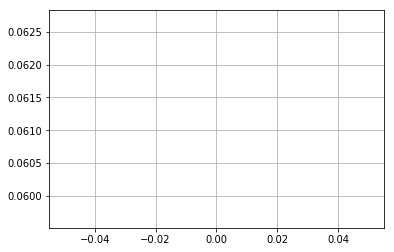

0
[]
Linear(in_features=4, out_features=10, bias=True)


ValueError: setting an array element with a sequence.

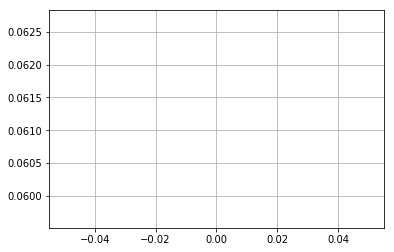

In [86]:
%%time
for epoh in range(num_epoch):
    
    if epoh % 50 == 0:
        plt.grid(True)
        plt.plot(loss_epoh, color='r')
        plt.plot(valid_loss_epoh, color='b')
        plt.plot(test_loss_epoh, color='g')
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
       
        print(epoh)
        if epoh > 0:
            print("train: ", loss_epoh[epoh-1])
            print("valid: ", valid_loss_epoh[epoh-1])
            print("test: ", test_loss_epoh[epoh-1])
        
    loss_acc = 0
    for mini_batch in dataloader:
        learn_inputs = autograd.Variable(mini_batch[:, 0:in_size].float()).unsqueeze(1)
        learn_labels = autograd.Variable(mini_batch[:, in_size].float()).unsqueeze(1)
        
        learn_output = net(learn_inputs)
        loss = criterion(learn_output, learn_labels)
        loss.backward()
        loss_acc += loss.data[0]
        
        lr = get_lr(net, lr)
        
        net.lin1.weight.data -= lr * net.lin1.weight.grad.data
        net.lin1.bias.data -= lr * net.lin1.bias.grad.data
        net.lin2.weight.data -= lr * net.lin2.weight.grad.data
        net.lin2.bias.data -= lr * net.lin2.bias.grad.data
        net.lin3.weight.data -= lr * net.lin3.weight.grad.data
        net.lin3.bias.data -= lr * net.lin3.bias.grad.data
        net.lin4.weight.data -= lr * net.lin4.weight.grad.data
        net.lin4.bias.data -= lr * net.lin4.bias.grad.data
        
    loss_epoh.append(loss_acc/len(dataloader))
    #print(loss_acc)
    
    valid_inputs = autograd.Variable(torch.from_numpy(valid_data[:, 0:in_size]).float()).unsqueeze(1)
    valid_labels = autograd.Variable(torch.from_numpy(valid_data[:, in_size]).float()).unsqueeze(1)
    test_inputs = autograd.Variable(torch.from_numpy(test_data[:, 0:in_size]).float()).unsqueeze(1)
    test_labels = autograd.Variable(torch.from_numpy(test_data[:, in_size]).float()).unsqueeze(1)
    valid_output = net(valid_inputs)
    valid_loss = criterion(valid_output, valid_labels).data.numpy()
    #print(np.max(valid_loss))
    test_output = net(test_inputs)
    test_loss = criterion(test_output, test_labels).data.numpy()
    
    valid_loss_epoh.append(np.mean(valid_loss))
    test_loss_epoh.append(np.mean(test_loss))


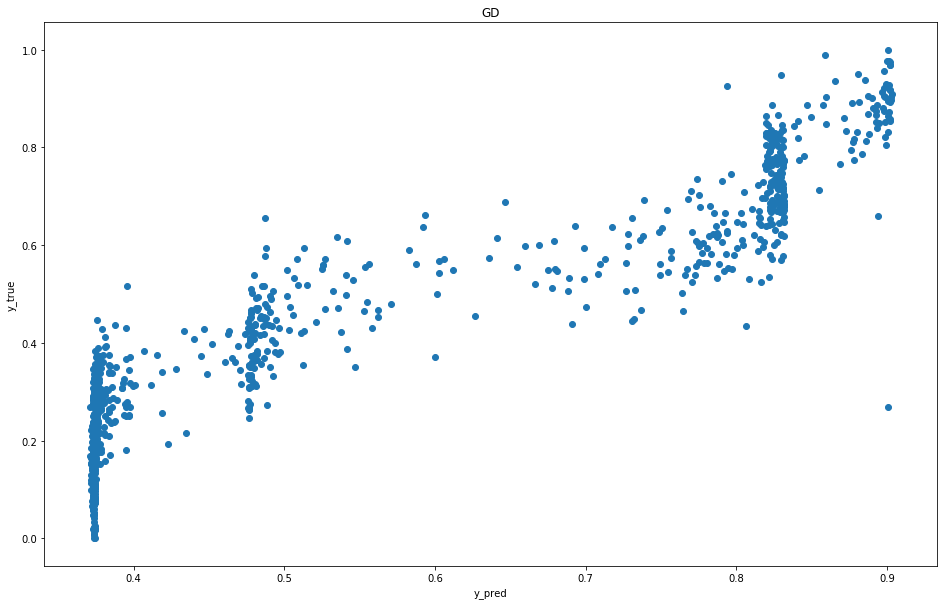

In [51]:
#net = MainPyNet(IN_SIZE, 1)

y_pred = net(autograd.Variable(torch.from_numpy(test_data[:, 0:in_size]).float()).unsqueeze(1))
fig = plt.figure(figsize=(16, 10), clear=True)
plt.scatter(np.sort(y_pred.data.numpy()), test_data[:,in_size])
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('GD')
#plt.show()
plt.savefig(RES_DIR+'pred_true/after_GD'+str(lr)+'.png')

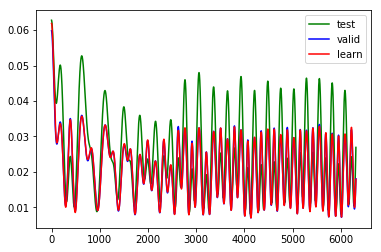

In [52]:
fig = plt.figure()

plt.plot(test_loss_epoh, color='g', label = 'test')
plt.plot(valid_loss_epoh, color='b', label = 'valid')
plt.plot(loss_epoh, color='r', label = 'learn')

plt.legend()
#plt.show()
plt.savefig(HOME_DIR+'GD/'+str(int(lr*10000))+'_new_train_valid_test.png', bbox_inches='tight')

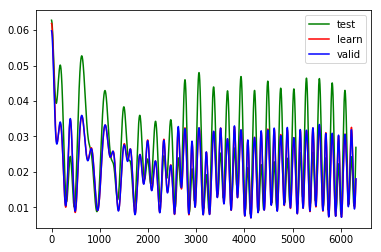

In [53]:
fig = plt.figure()

plt.plot(test_loss_epoh, color='g', label = 'test')

plt.plot(loss_epoh, color='r', label = 'learn')
plt.plot(valid_loss_epoh, color='b', label = 'valid')
plt.legend()
#plt.show()
plt.savefig(HOME_DIR+'GD/'+str(int(lr*10000))+'_new_1_train_valid_test.png', bbox_inches='tight')

In [54]:
print("learn:")
print(loss_epoh[-1])
print(math.sqrt(np.var(loss_epoh)))
print(math.sqrt(np.mean(loss_epoh)))

print("valid:")
print(valid_loss_epoh[-1])
print(math.sqrt(np.var(valid_loss_epoh)))
print(math.sqrt(np.mean(valid_loss_epoh)))

print("test:")
print(test_loss_epoh[-1])
print(math.sqrt(np.var(test_loss_epoh)))
print(math.sqrt(np.mean(test_loss_epoh)))

learn:
0.017915647476911545
0.008321207938023798
0.14567419178181812
valid:
0.01806832
0.008256849005393859
0.1456780493893697
test:
0.026923863
0.011611140796467285
0.1583517106793419
